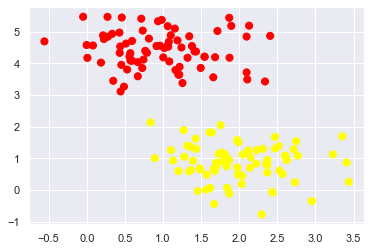

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, centers=2, random_state=0,
cluster_std=0.60)
y = np.where(y <= 0, -1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [33]:
import numpy as np 

class SVM:

    def __init__(self, learning_rate=0.001,C=0.1,lambda_param=0.001, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.C=C
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(self.w,x_i) - self.b) >= 1
                if condition:
                    #self.w -= self.lr * (2 * self.lambda_param * self.w)
                    self.w -= self.lambda_param *self.w
                    self.b = 0
                else:
                    #self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    #self.b -= self.lr * y_[idx]
                    self.w -= self.lambda_param *self.w - self.C*y_[idx]*X[idx]
                    self.b -= self.C*y[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [34]:
clf=SVM()
clf.fit(X,y)
print(clf.w,clf.b)

[ 1.87634477 -1.31017564] 0


In [35]:
def vis():
    def hyper(x,w,b,offset):
        return (-w[0]*x+b+offset)/w[1]
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    #plt.scatter(X[:,0],X[:,1],marker='o',c=y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    
    
    x0_1=np.amin(X[:,0])
    x0_2=np.amax(X[:,0])
    
    
    x0_1=hyper(x0_1,clf.w,clf.b,0)
    x0_2=hyper(x0_2,clf.w,clf.b,0)
    
    x1_1=hyper(x0_1,clf.w,clf.b,0)
    x1_2=hyper(x0_2,clf.w,clf.b,0)
    

    x1_1_m=hyper(x0_1,clf.w,clf.b,-1)
    x1_2_m=hyper(x0_2,clf.w,clf.b,-1)
    
    x1_1_p=hyper(x0_1,clf.w,clf.b,1)
    x1_2_p=hyper(x0_2,clf.w,clf.b,1)
    
    ax.plot([x0_1,x0_2],[x1_1,x1_2],'y--')
    ax.plot([x0_1,x0_2],[x1_1_m,x1_2_m],'k')
    ax.plot([x0_1,x0_2],[x1_1_p,x1_2_p],'k')
    
    
    x1_min = np.amin(X[:,1])
    x1_max=np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    plt.show()
    
    
    
    
    
    
    
    
    
    
    
    

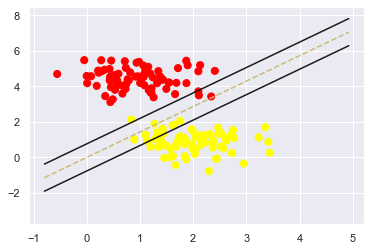

In [36]:
# c= 0.1
vis()